In [50]:
import pandas as pd

EMOTION_LABLES = ["happiness", "angry", "disgust", "fear", "neutral", "sadness", "surprise"]
# EMOTION_LABLES = ["happiness", "angry", "disgust", "fear", "sadness", "surprise"] # neutral 제외
SCORE_LABLES = [emo+"_score" for emo in EMOTION_LABLES]

In [51]:
features_df = pd.read_csv("extracted_features_v0.2.csv", index_col="wav_id")

labels_df_01 = pd.read_csv("4th.csv", encoding='cp949').set_index("wav_id")
labels_df_02 = pd.read_csv("5th_1st.csv", encoding='cp949').set_index("wav_id")
labels_df_03 = pd.read_csv("5th_2nd.csv", encoding='cp949').set_index("wav_id")

# 4차 + 5차_1차 + 5차_2차
labels_df = pd.concat([labels_df_01, labels_df_02, labels_df_03])

In [52]:
SITUATION_LABLES = labels_df['상황'].unique()
SITUATION_LABLES

array(['anger', 'sad', 'fear', 'disgust', 'neutral', 'happiness',
       'sadness', 'angry', 'surprise'], dtype=object)

In [53]:
def score_emotion(row):
    valued_emotions = {emo: 0 for emo in EMOTION_LABLES}
    
    for i in range(1, 6):
        emo_label = row.get(f'{i}번 감정').lower()
        if emo_label == 'neutral': continue

        emo_val = row.get(f'{i}번 감정세기', row.get(f'{i}번감정세기'))
        valued_emotions[emo_label] += emo_val / 10

    return [valued_emotions[emo] for emo in EMOTION_LABLES]

labels_df[SCORE_LABLES] = labels_df.apply(lambda row: pd.Series(score_emotion(row)), axis=1)

In [54]:
labels_df.head()

,발화문,상황,1번 감정,1번 감정세기,2번 감정,2번 감정세기,3번 감정,3번 감정세기,4번 감정,4번 감정세기,...,5번 감정세기,나이,성별,happiness_score,angry_score,disgust_score,fear_score,neutral_score,sadness_score,surprise_score
wav_id,,,,,,,,,,,,,,,,,,,,,
5e258fd1305bcf3ad153a6a4,"어, 청소 니가 대신 해 줘!",anger,Neutral,0,Angry,1,Neutral,0,Neutral,0,...,1,27,male,0.0,0.2,0.0,0.0,0.0,0.0,0.0
5e258fe2305bcf3ad153a6a5,둘 다 청소 하기 싫어. 귀찮아.,anger,Neutral,0,Angry,1,Neutral,0,Neutral,0,...,1,27,male,0.0,0.2,0.0,0.0,0.0,0.0,0.0
5e258ff5305bcf3ad153a6a6,둘 다 하기 싫어서 화내.,anger,Angry,1,Angry,1,Neutral,0,Angry,1,...,1,27,male,0.0,0.4,0.0,0.0,0.0,0.0,0.0
5e25902f305bcf3ad153a6a9,그럼 방세는 어떡해.,anger,Sadness,1,Sadness,1,Sadness,1,Sadness,1,...,1,27,male,0.0,0.0,0.0,0.0,0.0,0.5,0.0
5e27f90b5807b852d9e0157b,권태긴줄 알았는데 다른 사람이 생겼나보더라고.,sad,Sadness,1,Sadness,1,Sadness,1,Sadness,2,...,1,32,male,0.0,0.0,0.0,0.0,0.0,0.6,0.0


In [55]:
meta_columns = [
    "발화문", "상황", "1번 감정", "1번 감정세기", "2번 감정", "2번 감정세기",
    "3번 감정", "3번 감정세기", "4번 감정", "4번 감정세기", "5번 감정", "5번 감정세기",
    "나이", "성별"
]

labels_df.drop(columns=meta_columns)

,happiness_score,angry_score,disgust_score,fear_score,neutral_score,sadness_score,surprise_score
wav_id,,,,,,,
5e258fd1305bcf3ad153a6a4,0.0,0.2,0.0,0.0,0.0,0.0,0.0
5e258fe2305bcf3ad153a6a5,0.0,0.2,0.0,0.0,0.0,0.0,0.0
5e258ff5305bcf3ad153a6a6,0.0,0.4,0.0,0.0,0.0,0.0,0.0
5e25902f305bcf3ad153a6a9,0.0,0.0,0.0,0.0,0.0,0.5,0.0
5e27f90b5807b852d9e0157b,0.0,0.0,0.0,0.0,0.0,0.6,0.0
...,...,...,...,...,...,...,...
5fbe313c44697678c497c05a,0.1,0.0,0.0,0.0,0.0,0.5,0.0
5fbe251044697678c497bfb8,0.0,0.0,0.0,0.1,0.0,0.4,0.0
5fbe31584c55eb78bd7cee7f,0.0,0.0,0.0,0.1,0.0,0.4,0.0


In [59]:
data = features_df.join(labels_df, how='inner')

emotion_cols = [col for col in SCORE_LABLES]
X = data.drop(columns=emotion_cols+meta_columns)
intensity_cols = [c for c in X.columns if 'intensity' in c.lower()]
loudness_cols = [c for c in X.columns if 'loudness' in c.lower()]
X = X.drop(columns=intensity_cols+loudness_cols)
y = data[emotion_cols]

X.head()

,mfcc_sma[1]_max,mfcc_sma[1]_min,mfcc_sma[1]_range,mfcc_sma[1]_maxPos,mfcc_sma[1]_minPos,mfcc_sma[1]_amean,mfcc_sma[1]_linregc1,mfcc_sma[1]_linregc2,mfcc_sma[1]_linregerrA,mfcc_sma[1]_linregerrQ,...,F0env_sma_de_linregerrQ,F0env_sma_de_stddev,F0env_sma_de_skewness,F0env_sma_de_kurtosis,F0env_sma_de_quartile1,F0env_sma_de_quartile2,F0env_sma_de_quartile3,F0env_sma_de_iqr1-2,F0env_sma_de_iqr2-3,F0env_sma_de_iqr1-3
wav_id,,,,,,,,,,,,,,,,,,,,,
5e258fd1305bcf3ad153a6a4,9.603304,-46.109516,55.712822,30.0,134.0,-10.139825,-0.016705,-7.450303,7.912162,104.00426,...,68.07635,8.341203,2.874979,19.054754,-1.162051,0.012518,3.178476,1.174570,3.165958,4.340528
5e258fe2305bcf3ad153a6a5,5.406839,-47.194380,52.601220,246.0,227.0,-11.156253,0.014576,-13.444723,9.784966,141.40833,...,109.55907,10.498592,1.641979,10.047668,-4.297239,0.000000,5.946875,4.297239,5.946875,10.244114
5e258ff5305bcf3ad153a6a6,0.863343,-43.482900,44.346240,234.0,199.0,-15.204572,-0.024630,-11.079116,7.648299,87.69002,...,90.33827,9.569824,0.621378,5.098198,-3.372910,0.000000,5.525393,3.372910,5.525393,8.898302
5e25902f305bcf3ad153a6a9,9.962692,-34.374058,44.336750,132.0,222.0,-12.080271,0.022192,-15.564348,8.546246,98.85558,...,75.46028,8.815373,1.018880,6.957049,-2.294756,0.000000,3.532836,2.294756,3.532836,5.827592
5e27ec9f5807b852d9e01542,8.515552,-34.701054,43.216606,116.0,163.0,-8.019610,-0.017433,-5.282701,7.628012,92.34134,...,40.28366,6.452733,3.258206,21.836330,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [9]:
y.head()

,happiness_score,angry_score,disgust_score,fear_score,neutral_score,sadness_score,surprise_score
wav_id,,,,,,,
5e258fd1305bcf3ad153a6a4,0.0,0.2,0.0,0.0,0.0,0.0,0.0
5e258fe2305bcf3ad153a6a5,0.0,0.2,0.0,0.0,0.0,0.0,0.0
5e258ff5305bcf3ad153a6a6,0.0,0.4,0.0,0.0,0.0,0.0,0.0
5e25902f305bcf3ad153a6a9,0.0,0.0,0.0,0.0,0.0,0.5,0.0
5e27ec9f5807b852d9e01542,0.0,0.0,0.0,0.0,0.0,0.5,0.0


                 count_nonzero  ratio_nonzero(%)
happiness_score           8158             18.55
angry_score              14737             33.51
disgust_score             7740             17.60
fear_score                7562             17.20
neutral_score                0              0.00
sadness_score            29353             66.75
surprise_score            3690              8.39

--- happiness_score (n=8158) ---
count    8158.000
mean        0.316
std         0.243
min         0.100
25%         0.100
50%         0.200
75%         0.500
max         1.000
Name: happiness_score, dtype: float64

--- angry_score (n=14737) ---
count    14737.000
mean         0.351
std          0.242
min          0.100
25%          0.100
50%          0.300
75%          0.500
max          1.000
Name: angry_score, dtype: float64

--- disgust_score (n=7740) ---
count    7740.000
mean        0.278
std         0.223
min         0.100
25%         0.100
50%         0.200
75%         0.400
max         1.000

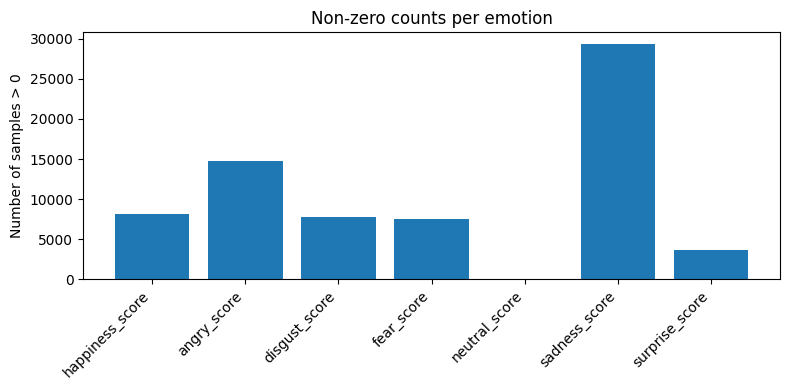

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# --- 1) 0 초과 개수 & 비율 계산 ---
nonzero_counts = (y > 0).sum()
nonzero_ratio  = nonzero_counts / len(y) * 100

dist_summary = pd.DataFrame({
    'count_nonzero': nonzero_counts,
    'ratio_nonzero(%)': nonzero_ratio.round(2)
})
print(dist_summary)

# --- 2) 각 감정별 0 초과 값의 기술통계 ---
for emo in y.columns:
    vals = y.loc[y[emo] > 0.0, emo]
    print(f"\n--- {emo} (n={len(vals)}) ---")
    print(vals.describe().round(3))

# --- 3) 막대그래프로 0 초과 샘플 수 시각화 ---
plt.figure(figsize=(8,4))
plt.bar(dist_summary.index, dist_summary['count_nonzero'])
plt.xticks(rotation=45, ha='right')
plt.ylabel('Number of samples > 0')
plt.title('Non-zero counts per emotion')
plt.tight_layout()
plt.show()


In [60]:
def clean_columns(col):
    return col.replace('[', '_').replace(']', '').replace('<', '_')

X.columns = [clean_columns(col) for col in X.columns]

In [62]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor
import numpy as np

# 1) multioutput 래퍼
base = XGBRegressor(
    n_estimators=400,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.9,
    colsample_bytree=0.9,
    random_state=42,
    tree_method='gpu_hist',       # ← GPU용 히스토리 방식
    predictor='gpu_predictor',    # ← GPU 상에서 예측
    gpu_id=0                      # ← 사용할 GPU 번호 (0부터)
)
multi = MultiOutputRegressor(base)

scores = cross_val_score(
    multi, X, y,
    scoring="neg_mean_squared_error",
    cv=5, n_jobs=-1
)
mse_scores = -scores
print(f"5-fold CV MSE: {mse_scores.mean():.4f} ± {mse_scores.std():.4f}")

# 3) train/test 분리
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 4) 테스트용 학습 (여기 반드시 필요)
multi.fit(X_train, y_train)

# 5) 테스트셋 예측
y_pred = multi.predict(X_test)

# 6) 감정별 성능 계산
for idx, emo in enumerate(y.columns):
    mse  = mean_squared_error(y_test.iloc[:, idx], y_pred[:, idx])
    rmse = mse ** 0.5
    mae  = mean_absolute_error(y_test.iloc[:, idx], y_pred[:, idx])
    r2   = r2_score(y_test.iloc[:, idx], y_pred[:, idx])
    
    print(f"--- {emo} ---")
    print(f"MSE : {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE : {mae:.4f}")
    print(f"R²  : {r2:.4f}\n")



5-fold CV MSE: 0.0258 ± 0.0041


c:\Users\SSAFY\Desktop\_fpjt\ml-test\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:25:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:45: `gpu_id` is deprecated since2.0.0, use `device` instead. E.g. device=cpu/cuda/cuda:0
  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\SSAFY\Desktop\_fpjt\ml-test\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:25:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\SSAFY\Desktop\_fpjt\ml-test\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:25:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\SSAFY\Deskto

--- happiness_score ---
MSE : 0.0195
RMSE: 0.1396
MAE : 0.0786
R²  : 0.2629

--- angry_score ---
MSE : 0.0416
RMSE: 0.2041
MAE : 0.1469
R²  : 0.1525

--- disgust_score ---
MSE : 0.0192
RMSE: 0.1387
MAE : 0.0778
R²  : 0.0879

--- fear_score ---
MSE : 0.0178
RMSE: 0.1335
MAE : 0.0751
R²  : 0.1008

--- neutral_score ---
MSE : 0.0000
RMSE: 0.0000
MAE : 0.0000
R²  : 1.0000

--- sadness_score ---
MSE : 0.0525
RMSE: 0.2292
MAE : 0.1873
R²  : 0.2882

--- surprise_score ---
MSE : 0.0061
RMSE: 0.0783
MAE : 0.0356
R²  : 0.1503



c:\Users\SSAFY\Desktop\_fpjt\ml-test\venv\Lib\site-packages\xgboost\core.py:2676: UserWarning: [13:27:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self.num_features() != data.shape[1]:


In [63]:
y.columns

Index(['happiness_score', 'angry_score', 'disgust_score', 'fear_score',
       'neutral_score', 'sadness_score', 'surprise_score'],
      dtype='object')

In [64]:
# 6) 감정별 성능 계산
for idx, emo in enumerate(SCORE_LABLES):
    mse  = mean_squared_error(y_test.iloc[:, idx], y_pred[:, idx])
    rmse = mse ** 0.5
    mae  = mean_absolute_error(y_test.iloc[:, idx], y_pred[:, idx])
    r2   = r2_score(y_test.iloc[:, idx], y_pred[:, idx])
    
    print(f"--- {emo} ---")
    print(f"MSE : {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE : {mae:.4f}")
    print(f"R²  : {r2:.4f}\n")

--- happiness_score ---
MSE : 0.0195
RMSE: 0.1396
MAE : 0.0786
R²  : 0.2629

--- angry_score ---
MSE : 0.0416
RMSE: 0.2041
MAE : 0.1469
R²  : 0.1525

--- disgust_score ---
MSE : 0.0192
RMSE: 0.1387
MAE : 0.0778
R²  : 0.0879

--- fear_score ---
MSE : 0.0178
RMSE: 0.1335
MAE : 0.0751
R²  : 0.1008

--- neutral_score ---
MSE : 0.0000
RMSE: 0.0000
MAE : 0.0000
R²  : 1.0000

--- sadness_score ---
MSE : 0.0525
RMSE: 0.2292
MAE : 0.1873
R²  : 0.2882

--- surprise_score ---
MSE : 0.0061
RMSE: 0.0783
MAE : 0.0356
R²  : 0.1503



In [90]:
test_feature = pd.read_csv("test.csv", index_col="wav_id")
# test_feature.columns = [clean_columns(col) for col in test_feature.columns]
test_feature.to_csv("result.csv")

In [97]:
test_feature = pd.read_csv("test.csv", index_col="wav_id")
intensity_cols = [c for c in test_feature.columns if 'intensity' in c.lower()]
loudness_cols = [c for c in test_feature.columns if 'loudness' in c.lower()]
test_feature = test_feature.drop(columns=loudness_cols+intensity_cols)
test_feature.columns = [clean_columns(col) for col in test_feature.columns]
test_feature


,mfcc_sma_1_max,mfcc_sma_1_min,mfcc_sma_1_range,mfcc_sma_1_maxPos,mfcc_sma_1_minPos,mfcc_sma_1_amean,mfcc_sma_1_linregc1,mfcc_sma_1_linregc2,mfcc_sma_1_linregerrA,mfcc_sma_1_linregerrQ,...,F0env_sma_de_linregerrQ,F0env_sma_de_stddev,F0env_sma_de_skewness,F0env_sma_de_kurtosis,F0env_sma_de_quartile1,F0env_sma_de_quartile2,F0env_sma_de_quartile3,F0env_sma_de_iqr1-2,F0env_sma_de_iqr2-3,F0env_sma_de_iqr1-3
wav_id,,,,,,,,,,,,,,,,,,,,,
angry_01_8,10.756322,-54.513306,65.269630,226.0,57.0,-12.849111,0.013523,-15.803989,9.930536,160.07198,...,46.258064,6.851184,0.911313,9.082946,-2.044131,0.0,3.931571,2.044131,3.931571,5.975702
angry_test,21.198046,-48.558655,69.756700,1781.0,641.0,-8.548215,0.000868,-11.124270,9.453074,141.64214,...,15.643345,3.955818,2.421736,33.733105,-0.502805,0.0,0.130181,0.502805,0.130181,0.632987
mumu_happy,0.233903,-35.570873,35.804775,0.0,201.0,-17.476433,-0.039642,-12.798733,4.982978,34.72540,...,62.118793,8.262791,4.361240,30.860530,0.000000,0.0,1.535260,0.000000,1.535260,1.535260
sad_test,18.365616,-60.335980,78.701600,2964.0,124.0,-14.716294,-0.000746,-13.361180,7.647176,120.28219,...,21.416970,4.630403,0.121920,8.500369,0.000000,0.0,0.200413,0.000000,0.200413,0.200413
일반_김지수_드라마_담담한_슬픔 (mp3cut.net),25.328974,-51.184093,76.513070,476.0,173.0,-6.754975,-0.002696,-5.597086,9.437143,142.64070,...,35.147434,5.957128,1.740265,14.896964,-0.999467,0.0,0.952941,0.999467,0.952941,1.952409
일반_정다현_20대여(차분-슬픔-심각) (mp3cut.net),26.047096,-56.182890,82.229990,475.0,180.0,-5.121414,0.015095,-10.600861,10.152011,198.85083,...,25.192457,5.050450,2.154539,24.426476,-0.311090,0.0,1.054292,0.311090,1.054292,1.365382
티모 (mp3cut.net),6.611150,-49.143574,55.754723,337.0,319.0,-21.230740,-0.002085,-20.781322,10.180109,148.44527,...,58.242620,7.723068,3.056769,22.967290,-1.314974,0.0,2.584575,1.314974,2.584575,3.899549


In [98]:
y_t = multi.predict(test_feature)
y_df = pd.DataFrame(y_t, columns=SCORE_LABLES)

y_df

,happiness_score,angry_score,disgust_score,fear_score,neutral_score,sadness_score,surprise_score
0,-0.021051,0.583451,0.070315,0.072779,0.0,0.115513,0.010503
1,0.160674,0.443240,0.059882,0.197455,0.0,0.226699,0.069166
2,0.222759,0.122928,0.043358,0.061787,0.0,0.144631,0.056969
3,0.245049,0.518708,0.029806,0.076385,0.0,0.188511,0.114585
4,0.070075,0.292844,0.065577,0.062507,0.0,0.159350,0.051171
5,0.051335,0.142077,0.034519,0.057352,0.0,0.247187,0.006952
6,0.192498,0.476567,0.166341,0.181471,0.0,0.145635,0.133966


In [121]:
majority = labels_df[labels_df['sadness_score'] > 0]
minority = labels_df[labels_df['sadness_score'] == 0]

majority_under = majority.sample(frac=0.2, random_state=42)
# majority_under
final_df = pd.concat([majority_under, minority])
# final_df = final_df.drop(columns=meta_columns)
final_df

,발화문,상황,1번 감정,1번 감정세기,2번 감정,2번 감정세기,3번 감정,3번 감정세기,4번 감정,4번 감정세기,...,5번 감정세기,나이,성별,happiness_score,angry_score,disgust_score,fear_score,neutral_score,sadness_score,surprise_score
wav_id,,,,,,,,,,,,,,,,,,,,,
5f917edc9e04b149046cdb9a,주식을 추천해준 지인이 전자 종목이 좋다고 해서 전자 종목을 구입했어.,sadness,neutral,0,neutral,0,sadness,1,sadness,1,...,1,46,female,0.0,0.0,0.0,0.0,0.0,0.3,0.0
5e49cf94963e443aee02b5c6,올해는 공채 시즌 마지막이어서 이제 면접 못 보거든. 내년에 내가 가고 싶은 회사 ...,sad,Sadness,2,Sadness,2,Sadness,1,Sadness,2,...,1,40,female,0.0,0.0,0.0,0.0,0.0,0.8,0.0
5ef8c044497740547350bfaf,사람들이 귀엽고 어릴 때 잠깐 키우다가 버리는 경우가 대부분이래. 버려지는 강아지들...,disgust,Sadness,1,Angry,2,Sadness,1,Sadness,1,...,1,46,female,0.0,0.2,0.0,0.0,0.0,0.4,0.0
5f03cd78b140144dfcfee42c,나 면접 또 떨어졌어.,sad,Sadness,2,Sadness,2,Sadness,2,Sadness,1,...,2,48,female,0.0,0.0,0.0,0.0,0.0,0.9,0.0
5fbca12944697678c497bad7,너무 속상해.,disgust,neutral,0,sadness,1,neutral,0,happiness,1,...,1,22,female,0.1,0.0,0.0,0.0,0.0,0.2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5fbe29d9576e9378b67ad456,화장실은 청소를 해도 곰팡이가 없어지지가 않아.,angry,angry,2,disgust,1,disgust,2,disgust,1,...,1,24,female,0.0,0.3,0.4,0.0,0.0,0.0,0.0
5fbe2a024c55eb78bd7cee0d,나는 그래도 환기 해.,angry,happiness,1,angry,1,neutral,0,neutral,0,...,1,24,female,0.1,0.2,0.0,0.0,0.0,0.0,0.0
5fbe32f544697678c497c06c,아까 해피 산책시키다가 엄청 놀랬어.,surprise,neutral,0,neutral,0,neutral,0,surprise,1,...,0,23,female,0.0,0.0,0.0,0.0,0.0,0.0,0.1


In [119]:
data = features_df.join(final_df, how='inner')

emotion_cols = [col for col in SCORE_LABLES]
X = data.drop(columns=emotion_cols+meta_columns)
intensity_cols = [c for c in X.columns if 'intensity' in c.lower()]
loudness_cols = [c for c in X.columns if 'loudness' in c.lower()]
X = X.drop(columns=intensity_cols+loudness_cols)
y = data[emotion_cols]

X.columns = [clean_columns(col) for col in X.columns]
X.head()

,mfcc_sma_1_max,mfcc_sma_1_min,mfcc_sma_1_range,mfcc_sma_1_maxPos,mfcc_sma_1_minPos,mfcc_sma_1_amean,mfcc_sma_1_linregc1,mfcc_sma_1_linregc2,mfcc_sma_1_linregerrA,mfcc_sma_1_linregerrQ,...,F0env_sma_de_linregerrQ,F0env_sma_de_stddev,F0env_sma_de_skewness,F0env_sma_de_kurtosis,F0env_sma_de_quartile1,F0env_sma_de_quartile2,F0env_sma_de_quartile3,F0env_sma_de_iqr1-2,F0env_sma_de_iqr2-3,F0env_sma_de_iqr1-3
wav_id,,,,,,,,,,,,,,,,,,,,,
5e258fd1305bcf3ad153a6a4,9.603304,-46.109516,55.712822,30.0,134.0,-10.139825,-0.016705,-7.450303,7.912162,104.00426,...,68.076350,8.341203,2.874979,19.054754,-1.162051,0.012518,3.178476,1.174570,3.165958,4.340528
5e258fe2305bcf3ad153a6a5,5.406839,-47.194380,52.601220,246.0,227.0,-11.156253,0.014576,-13.444723,9.784966,141.40833,...,109.559070,10.498592,1.641979,10.047668,-4.297239,0.000000,5.946875,4.297239,5.946875,10.244114
5e258ff5305bcf3ad153a6a6,0.863343,-43.482900,44.346240,234.0,199.0,-15.204572,-0.024630,-11.079116,7.648299,87.69002,...,90.338270,9.569824,0.621378,5.098198,-3.372910,0.000000,5.525393,3.372910,5.525393,8.898302
5e27fb575807b852d9e01595,35.966366,-33.053190,69.019554,380.0,365.0,7.115054,-0.022015,12.872098,9.258681,153.08858,...,30.936615,5.635099,5.023177,39.913948,-0.810442,0.000000,1.304012,0.810442,1.304012,2.114453
5e27fbdc5807b852d9e0159d,29.617071,-38.405777,68.022850,198.0,143.0,4.198766,0.030208,-1.057392,10.812742,189.50058,...,35.236633,6.128344,4.445557,32.566890,-0.583478,0.000000,1.194876,0.583478,1.194876,1.778354


                 count_nonzero  ratio_nonzero(%)
happiness_score           5980             25.52
angry_score               9014             38.47
disgust_score             5062             21.60
fear_score                3833             16.36
neutral_score                0              0.00
sadness_score             8808             37.59
surprise_score            2548             10.87

--- happiness_score (n=5980) ---
count    5980.000
mean        0.371
std         0.255
min         0.100
25%         0.100
50%         0.300
75%         0.600
max         1.000
Name: happiness_score, dtype: float64

--- angry_score (n=9014) ---
count    9014.000
mean        0.417
std         0.265
min         0.100
25%         0.200
50%         0.400
75%         0.600
max         1.000
Name: angry_score, dtype: float64

--- disgust_score (n=5062) ---
count    5062.00
mean        0.32
std         0.25
min         0.10
25%         0.10
50%         0.20
75%         0.50
max         1.00
Name: disgust_sc

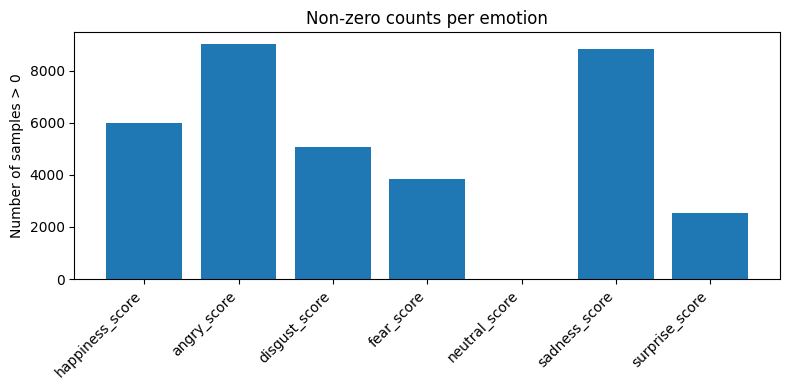

In [120]:
nonzero_counts = (y > 0).sum()
nonzero_ratio  = nonzero_counts / len(y) * 100

dist_summary = pd.DataFrame({
    'count_nonzero': nonzero_counts,
    'ratio_nonzero(%)': nonzero_ratio.round(2)
})
print(dist_summary)

# --- 2) 각 감정별 0 초과 값의 기술통계 ---
for emo in y.columns:
    vals = y.loc[y[emo] > 0.0, emo]
    print(f"\n--- {emo} (n={len(vals)}) ---")
    print(vals.describe().round(3))

# --- 3) 막대그래프로 0 초과 샘플 수 시각화 ---
plt.figure(figsize=(8,4))
plt.bar(dist_summary.index, dist_summary['count_nonzero'])
plt.xticks(rotation=45, ha='right')
plt.ylabel('Number of samples > 0')
plt.title('Non-zero counts per emotion')
plt.tight_layout()
plt.show()

In [122]:
base2 = XGBRegressor(
    n_estimators=400,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.9,
    colsample_bytree=0.9,
    random_state=42,
    tree_method='gpu_hist',       # ← GPU용 히스토리 방식
    predictor='gpu_predictor',    # ← GPU 상에서 예측
    gpu_id=0                      # ← 사용할 GPU 번호 (0부터)
)
multi = MultiOutputRegressor(base2)

scores = cross_val_score(
    multi, X, y,
    scoring="neg_mean_squared_error",
    cv=5, n_jobs=-1
)
mse_scores = -scores
print(f"5-fold CV MSE: {mse_scores.mean():.4f} ± {mse_scores.std():.4f}")

# 3) train/test 분리
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 4) 테스트용 학습 (여기 반드시 필요)
multi.fit(X_train, y_train)

# 5) 테스트셋 예측
y_pred = multi.predict(X_test)

# 6) 감정별 성능 계산
for idx, emo in enumerate(y.columns):
    mse  = mean_squared_error(y_test.iloc[:, idx], y_pred[:, idx])
    rmse = mse ** 0.5
    mae  = mean_absolute_error(y_test.iloc[:, idx], y_pred[:, idx])
    r2   = r2_score(y_test.iloc[:, idx], y_pred[:, idx])
    
    print(f"--- {emo} ---")
    print(f"MSE : {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE : {mae:.4f}")
    print(f"R²  : {r2:.4f}\n")

5-fold CV MSE: 0.0322 ± 0.0074


c:\Users\SSAFY\Desktop\_fpjt\ml-test\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:24:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\SSAFY\Desktop\_fpjt\ml-test\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:24:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\SSAFY\Desktop\_fpjt\ml-test\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:24:21] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist",

--- happiness_score ---
MSE : 0.0293
RMSE: 0.1711
MAE : 0.1104
R²  : 0.3415

--- angry_score ---
MSE : 0.0569
RMSE: 0.2385
MAE : 0.1821
R²  : 0.1808

--- disgust_score ---
MSE : 0.0309
RMSE: 0.1757
MAE : 0.1055
R²  : 0.1051

--- fear_score ---
MSE : 0.0222
RMSE: 0.1490
MAE : 0.0841
R²  : 0.1469

--- neutral_score ---
MSE : 0.0000
RMSE: 0.0000
MAE : 0.0000
R²  : 1.0000

--- sadness_score ---
MSE : 0.0433
RMSE: 0.2082
MAE : 0.1554
R²  : 0.2266

--- surprise_score ---
MSE : 0.0100
RMSE: 0.1002
MAE : 0.0486
R²  : 0.1714



c:\Users\SSAFY\Desktop\_fpjt\ml-test\venv\Lib\site-packages\xgboost\core.py:2676: UserWarning: [15:25:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self.num_features() != data.shape[1]:
